# U-Net inference

In [9]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import keras
import matplotlib.pyplot as plt

In [1]:
# Google Drive setup
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
@keras.saving.register_keras_serializable()
def jaccard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

@keras.saving.register_keras_serializable()
def jaccard_coef_loss(y_true, y_pred):
    return -jaccard_coef(y_true, y_pred)  # -1 multiplied as we want to minimize this value as loss function

In [6]:
model_path = "/content/gdrive/MyDrive/cell_nuclei_data/output/unet/20240424-06:51_unet_cell_nuclei_150epochs.keras"
my_model = load_model(model_path)

In [14]:
img_path = '/content/gdrive/MyDrive/cell_nuclei_data/COCO_cell_nuclei/images/J7_25_a_ann0019.jpg'
img = load_img(img_path, target_size=(my_model.input_shape[1:3]))  # Match model input size
x = img_to_array(img)
x = x / 255.0  # Assuming model expects normalized values (0-1)
x = np.expand_dims(x, axis=0)

# Get segmentation mask
mask = my_model.predict(x)

1/1 [==============================] - 1s 522ms/step


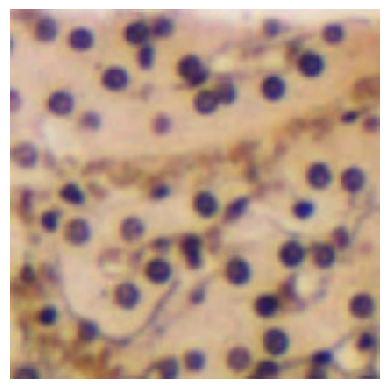

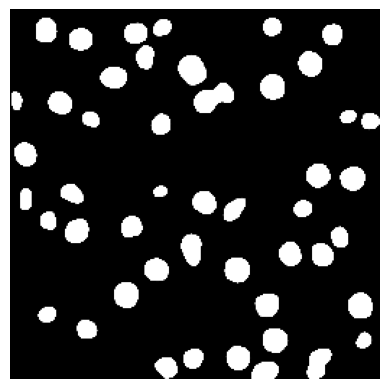

In [28]:
plt.imshow(img)
plt.axis('off')
# plt.savefig('pic.png')
plt.show()
mask = np.squeeze(mask)
plt.imshow(mask, cmap="gray")
plt.axis('off')
# plt.savefig('mask.png')
plt.show()

In [31]:
plt.imsave("pic.png", np.array(img))
plt.imsave("mask.png", mask, cmap="gray")

In [32]:
print(img)

<PIL.Image.Image image mode=RGB size=256x256 at 0x7F655180F040>
